[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Chuvard/Credit_card_default_prediction/blob/main/Credit_card_default_prediction.ipynb)

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

# Contents

1. [Problem Statement](#1-problem-statement)
2. [Data Description](#2-data-description)
3. [Objective](#3-objective)
4. [Import Required Libraries](#4-import-required-libraries)
5. [Import Data](#5-import-data)
6. [Data Preprocessing](#6-data-preprocessing)
   * [6.1. Inspecting Data](#61-inspecting-data)
   * [6.2. Exploratory Data Analysis](#62-exploratory-data-analysis)
   * [6.3. Feature Engineering](#63-feature-engineering)
7. [Model Selection](#7-model-selection)
   * [7.1. Logistic Regression Classification](#71-logistic-regression-classification)
   * [7.2. Support Vector Classification](#72-support-vector-classification)
   * [7.3. Decision Tree](#73-decision-tree)
   * [7.4. Random Forest](#74-random-forest)
   * [7.5. XGBoost Classification](#75-xgboost-classification)
8. [Evaluating the models](#8-evaluating-the-models)

***

## 1. Problem Statement

This project focuses on predicting customer default payments in Taiwan. From a risk management standpoint, accurately estimating the probability of default is more valuable than simply classifying clients as credible or not. The [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) can be utilized to assess which customers are likely to default on their credit card payments.

***

## 2. Data Description

This research focused on analyzing customer default payments in Taiwan and comparing the predictive accuracy of default probabilities using [credit card data from April to September 2005, measured in New Taiwan dollars](https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients).

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .; X11 = the repayment status in April, 2005. 
The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .; X23 = amount paid in April, 2005.

***

## 3. Objective

The goal of our project is to predict which customers may default in the upcoming months. Before we proceed, let's quickly define what is meant by **Credit Card Default**.

> We all know what a **credit card ** is—a payment card that allows charges to be made against a line of credit rather than the account holder's cash deposits. When someone uses a credit card for a purchase, the account accrues a balance that must be paid off monthly.

> **Credit card default** occurs when you become significantly delinquent on your credit card payments. Missing one or two payments does not constitute a default. A default happens when you fail to pay the Minimum Amount Due on the credit card for several consecutive months.

***

## 4. Import Required Libraries

In [2]:
# Import required libraries and modules
import matplotlib.pyplot as plt # plotting
from mpl_toolkits.mplot3d import Axes3D # creating 3D plots in Matplotlib
import seaborn as sns

import os # accessing directory structure
import joblib # Import the joblib library, which is commonly used for saving and loading machine learning models

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE # data augmentation to make data balanced
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import  XGBClassifier
import lightgbm as lgb 
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

***

## 5. Import Data

In [3]:
# Read the CSV file located at './data/UCI_Credit_Card.csv' into a DataFrame
df1 = pd.read_csv('./data/UCI_Credit_Card.csv', delimiter=',')

# Assign a custom attribute 'dataframeName' to the DataFrame df1. This attribute stores the name of the CSV file used to create the DataFrame
df1.dataframeName = 'UCI_Credit_Card.csv'

# Get the number of rows and columns in the 'df1' DataFrame
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns in original DataFrame')

There are 30000 rows and 25 columns in original DataFrame


We duplicate the `df1` dataset into a separate `df` dataset, which will be used for all subsequent computations. First, let's review a portion of the data to ensure it has been loaded correctly.

In [4]:
# Create a copy of the DataFrame 'df1' and assign it to the variable 'defaulters'
df = df1.copy()

# Get the number of rows and columns in the 'defaulters' DataFrame
nRows, nCols = df.shape
print(f'There are {nRows} rows and {nCols} columns in copied DataFrame')

There are 30000 rows and 25 columns in copied DataFrame


***

## 6. Data Preprocessing

### 6.1. Inspecting Data

In [5]:
# Print the shape (i.e., the number of rows and columns) of the DataFrame 'defaulters'.
print(df.shape)

# Display the first few rows (usually the first 5 by default) of the DataFrame 'defaulters'.
df.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
# Returns a transposed version of the DataFrame with descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [7]:
# Display missing values for each column
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Summary: We observe that all 25 columns have 30,000 entries, indicating that there are no missing values. 

### 6.2. Exploratory Data Analysis

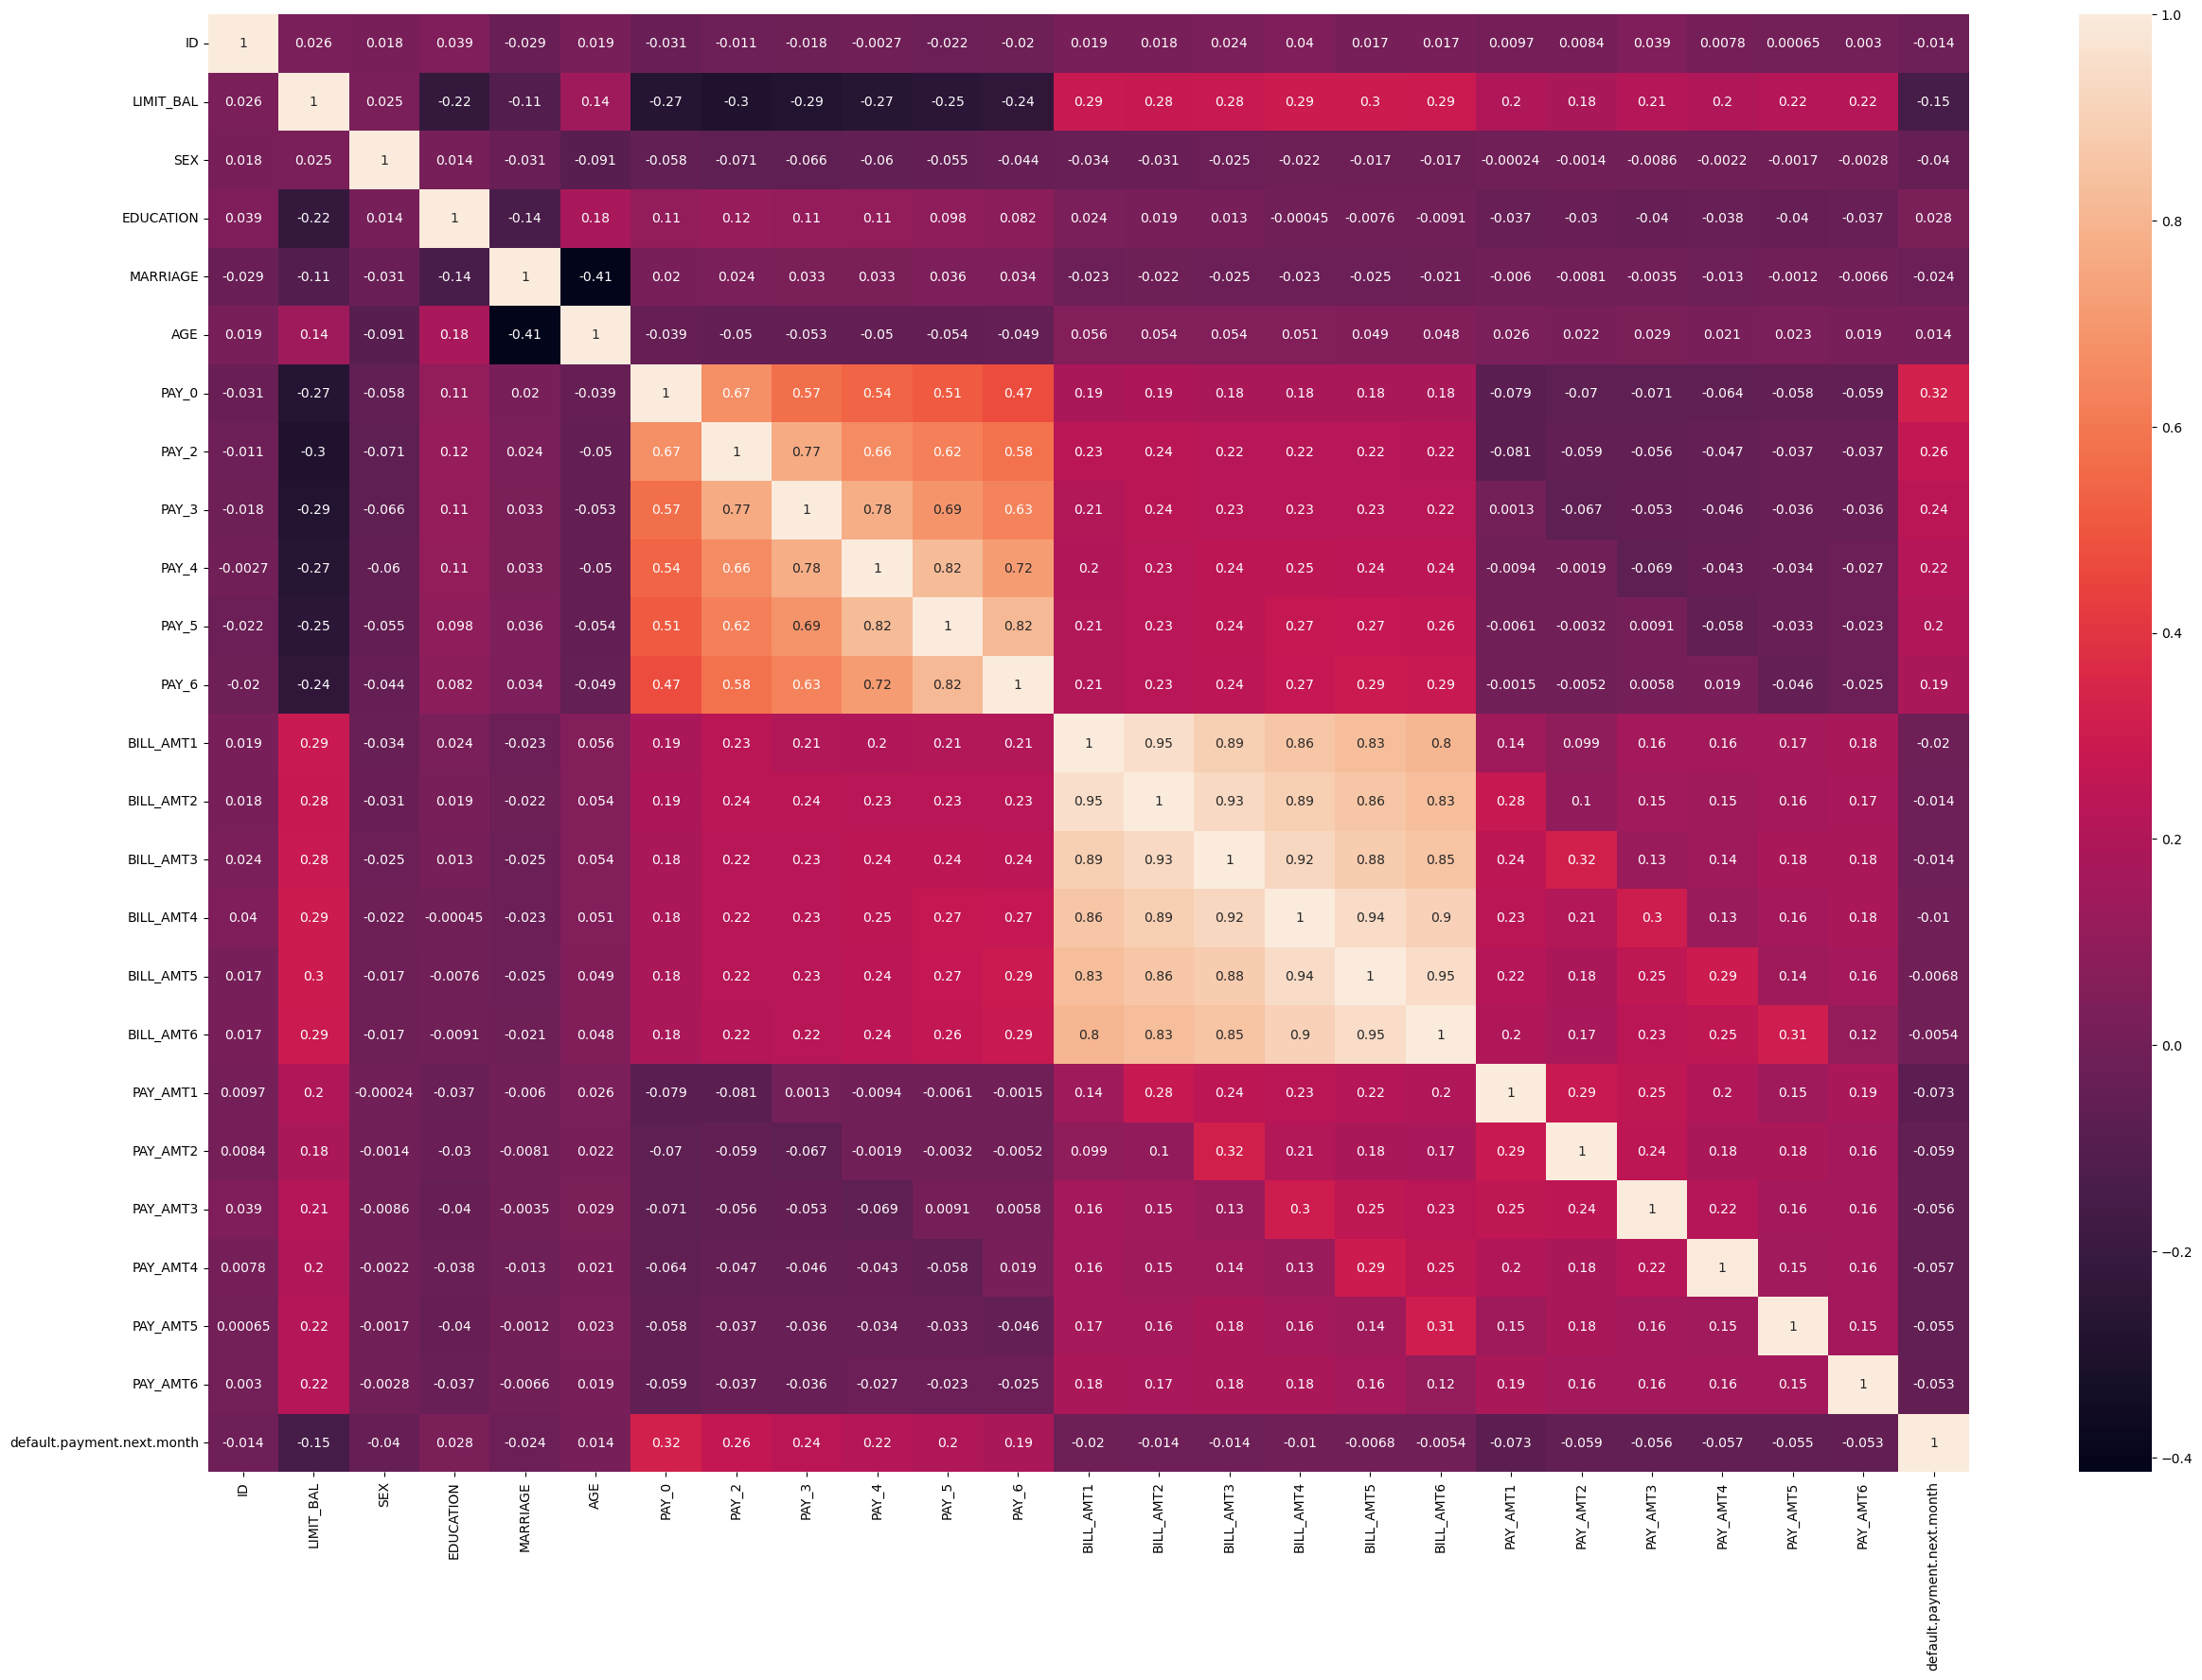

In [8]:
# Create a new figure with a specified size of 30x20 inches
plt.subplots(figsize=(30, 20))

# Generate a heatmap using seaborn, which visualizes the correlation matrix of the DataFrame `df`
# The `annot=True` parameter adds the correlation coefficients to the heatmap
sns.heatmap(df.corr(), annot=True)

# Display the plot
plt.show()

### **Dependent Variable:**

In [7]:
# Renaming for better convinience
df['IsDefaulter'] = df['default.payment.next.month']
df.drop('default.payment.next.month', axis = 1)
# df.rename({'default.payment.next.month' : 'IsDefaulter'}, inplace=True)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


<Axes: xlabel='IsDefaulter', ylabel='count'>

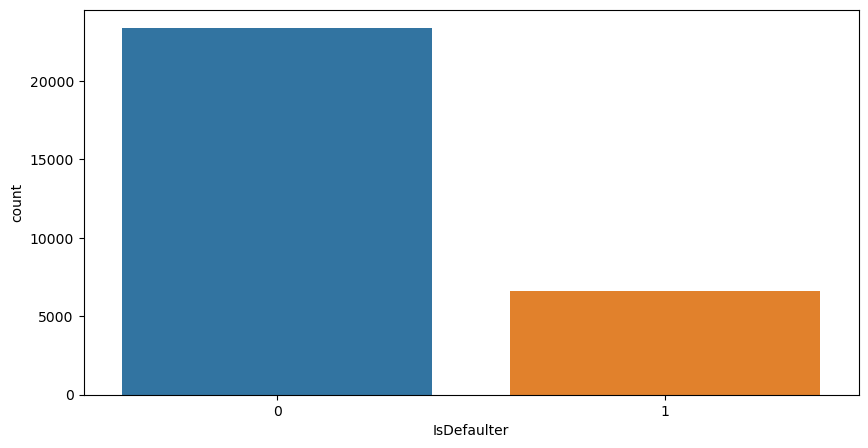

In [8]:
# Create a new figure with a specified size (10 inches wide by 5 inches tall) and create a count plot using Seaborn to display disribution of `IsDefaulter` variable
plt.figure(figsize=(10,5))
sns.countplot(x = 'IsDefaulter', data = df)

In [9]:
# Display disribution of `IsDefaulter` variable
df['IsDefaulter'].value_counts()

IsDefaulter
0    23364
1     6636
Name: count, dtype: int64

Summary: As we can see from above graph that both classes are not in proportion and we have imbalanced dataset.

### **Independent Variable:**

#### **Categorical  Features**

Our dataset includes several categorical features. Let's examine how these features relate to our target class

**SEX**


*   1 - Male
*   2 - Female

In [10]:
# Examine the distribution of `SEX` variable
df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

**Education**

> 1 = graduate school; 2 = university; 3 = high school; 4 = others

In [11]:
# Examine the distribution of `EDUCATION` variable
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

! Note: In the dataset, we encounter values such as 5, 6, and 0 for which no descriptions are provided. We can categorize these values under "4," which represents "Others."

In [12]:
# Create a boolean mask to identify rows where the 'EDUCATION' column has a value of 5, 6, or 0
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)

# Use the boolean mask to select these rows in the 'EDUCATION' column and set their value to 4
df.loc[fil, 'EDUCATION'] = 4

# Count the occurrences of each unique value in the 'EDUCATION' column and display the counts
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64

**Marriage**

> 1 = married; 2 = single; 3 = others

In [13]:
# Examine the distribution of `MARRIAGE` variable
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

! Note: There are a few values of 0 that are not clearly defined, so we will categorize them as "Others."

In [14]:
# Create a boolean mask where the 'MARRIAGE' column has a value of 0
fil = df['MARRIAGE'] == 0

# Use the boolean mask to locate the rows in the 'MARRIAGE' column where the value is 0
# Replace these values with 3
df.loc[fil, 'MARRIAGE'] = 3

# Display the count of each unique value in the 'MARRIAGE' column
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

##### **Plotting our categorical features**

In [15]:
# Itemize categorical features such as 'SEX', 'EDUCATION', 'MARRIAGE'
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [16]:
# Create the DataFrame `df_cat` only for categorical features
df_cat = df[categorical_features]
df_cat['Defaulter'] = df['IsDefaulter']

In [17]:
# Apply one-hot encoding for categorical variables 'SEX', 'EDUCATION', 'MARRIAGE'
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

<Figure size 1000x500 with 0 Axes>

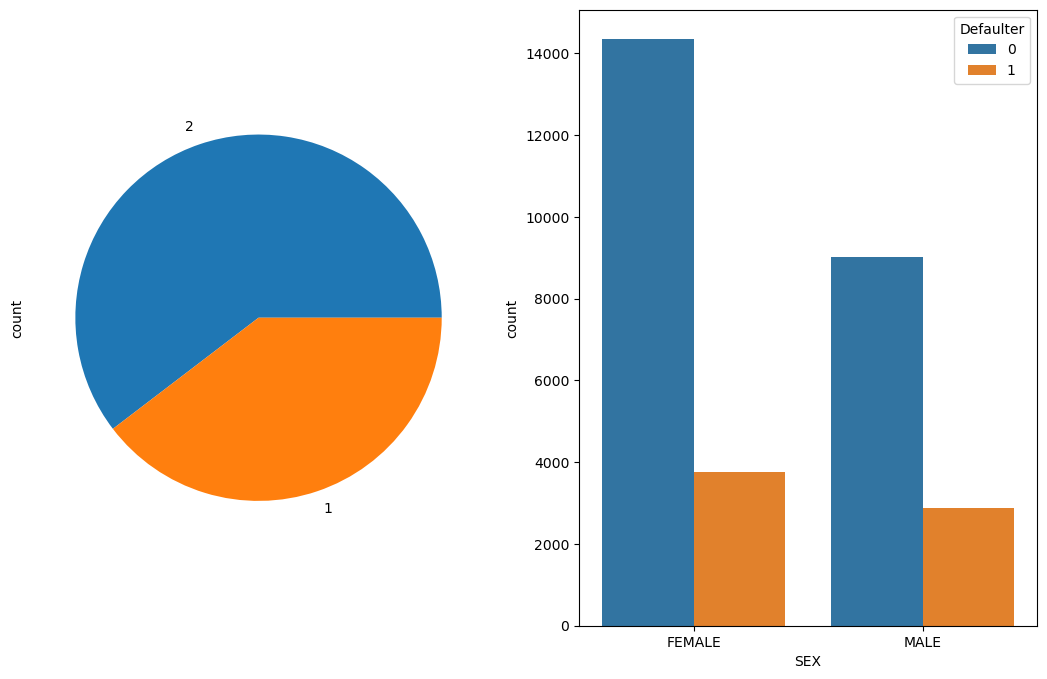

<Figure size 1000x500 with 0 Axes>

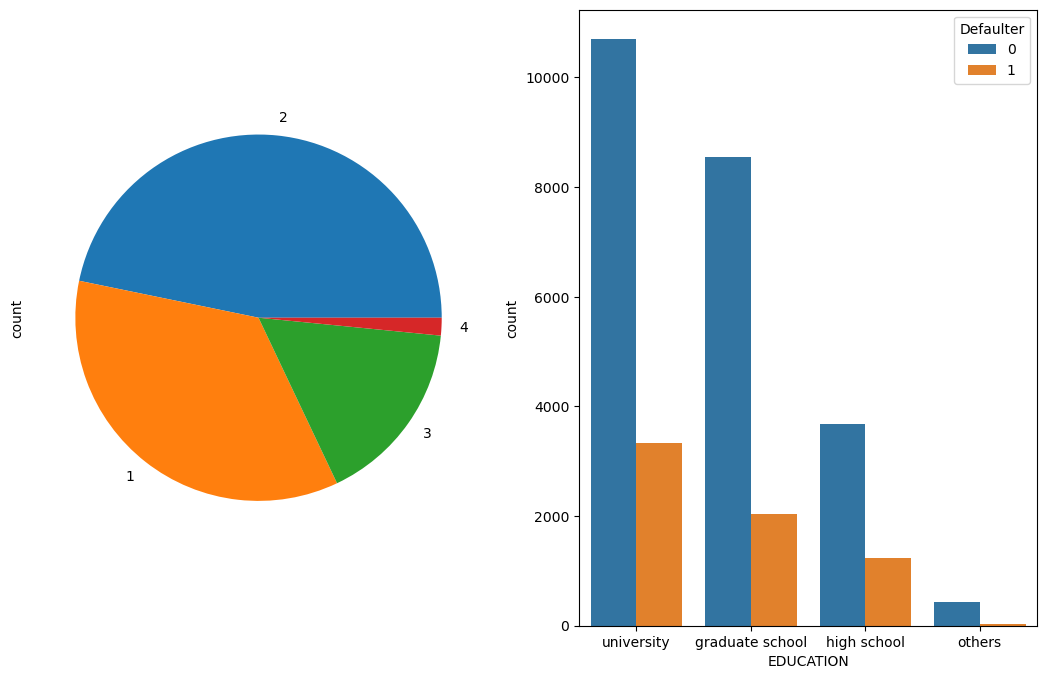

<Figure size 1000x500 with 0 Axes>

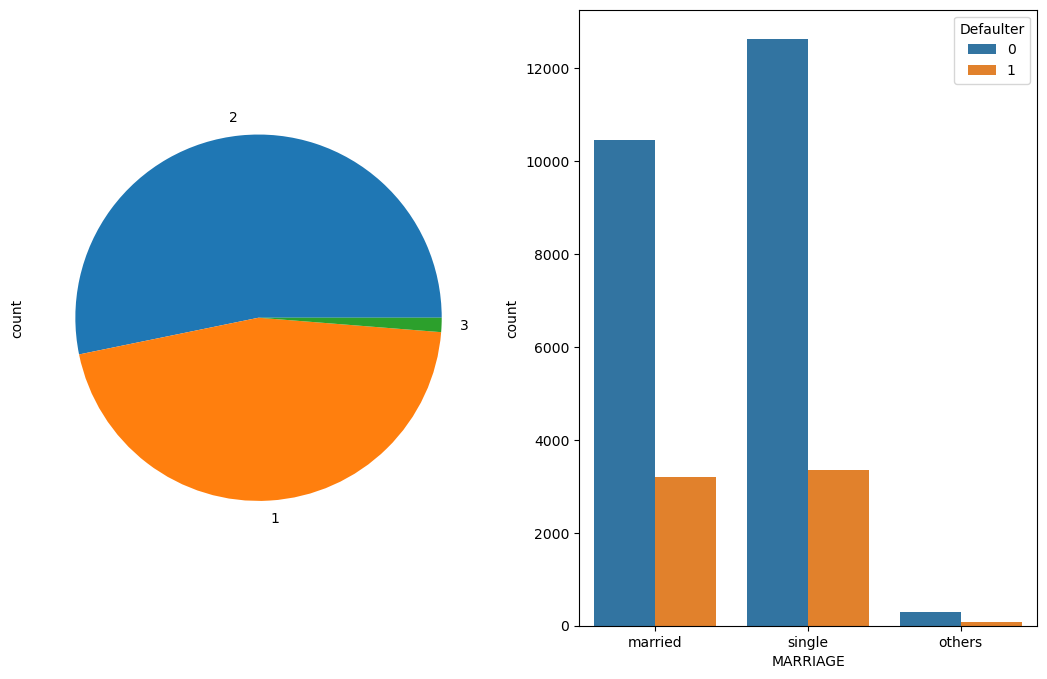

In [18]:
# Loop through each column in the list of categorical features
for col in categorical_features:
    # Create a new figure with a specific size for each iteration
    plt.figure(figsize=(10,5))
    
    # Create a subplot grid with 1 row and 2 columns
    fig, axes = plt.subplots(ncols=2, figsize=(13,8))
    
    # Plot a pie chart showing the distribution of each category in the current column. The pie chart will be drawn on the first subplot (axes[0])
    df[col].value_counts().plot(kind="pie", ax=axes[0], subplots=True)
    
    # Plot a count plot (bar plot) for the current column. The plot will be drawn on the second subplot (axes[1]). It shows the counts of each category, colored by the 'Defaulter' category
    sns.countplot(x=col, hue='Defaulter', data=df_cat)

Below is the summary with few observations for categorical features:

* There are more females credit card holder, so number of defaulter have high proportion of females.
* Number of defaulters have a higher proportion of educated people (graduate school and university)
* Number of defaulters have a higher proportion of Singles.

#### **Numerical  Features**

**Limit Balance**

In [19]:
# Descriptive statistics for numerical variable 'LIMIT_BAL' (limit credit balance for borrower)
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [20]:
print(f'The minimum value for credic limit in NT dollars:', df['LIMIT_BAL'].min())

The minimum value for credic limit in NT dollars: 10000.0


In [21]:
print(f'The minimum value for credic limit in NT dollars:', df['LIMIT_BAL'].max())

The minimum value for credic limit in NT dollars: 1000000.0


<Axes: xlabel='IsDefaulter', ylabel='LIMIT_BAL'>

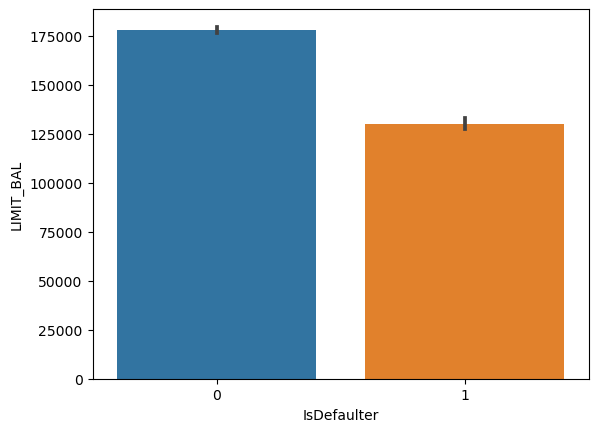

In [22]:
# Distribution of credit card holders' default risk based on their available credit limit balance [bar plot]
sns.barplot(x='IsDefaulter', y='LIMIT_BAL', data=df)

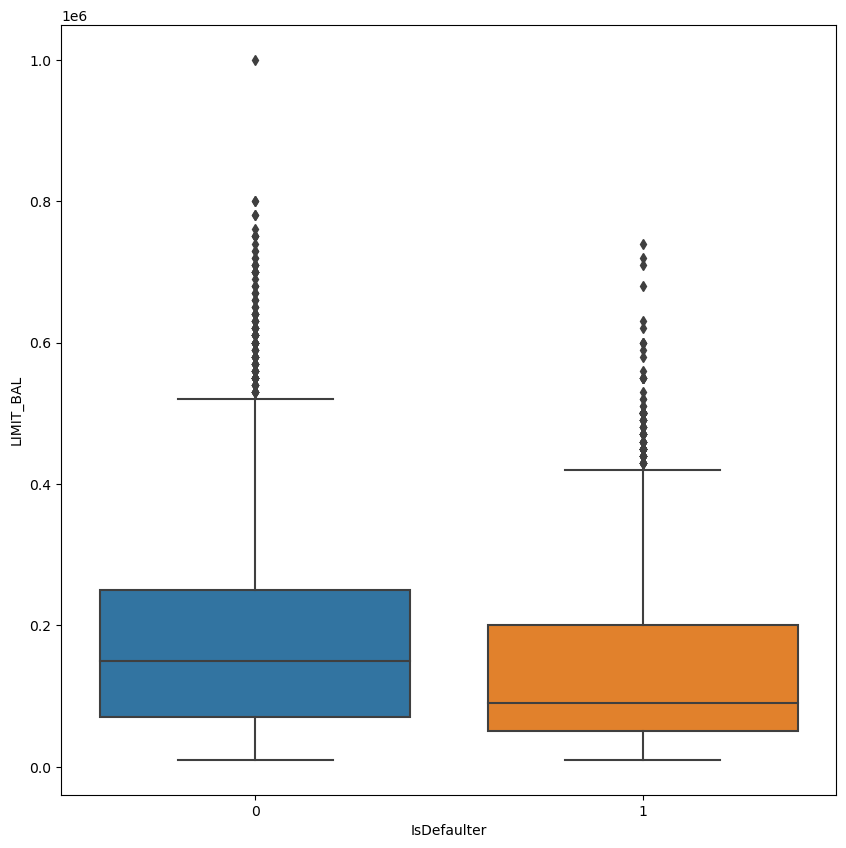

In [23]:
# Distribution of credit card holders' default risk based on their available credit limit balance [box plots]
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="LIMIT_BAL", data=df)

In [24]:
# Renaming numerical columns 
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'}, inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'}, inplace=True)

In [25]:
# Inspect data from DataFrame
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month,IsDefaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0


**Age**

Plotting graph of number of ages of all people with credit card irrespective of gender.

In [26]:
# Display disribution of `AGE` variable
df['AGE'].value_counts()

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: count, dtype: int64

In [27]:
# Inspect the data type for 'AGE'
df['AGE'].dtype

dtype('int64')

In [28]:
# Double-check the data type 'int' of 'AGE'
df['AGE'] = df['AGE'].astype('int')

<Axes: xlabel='AGE', ylabel='count'>

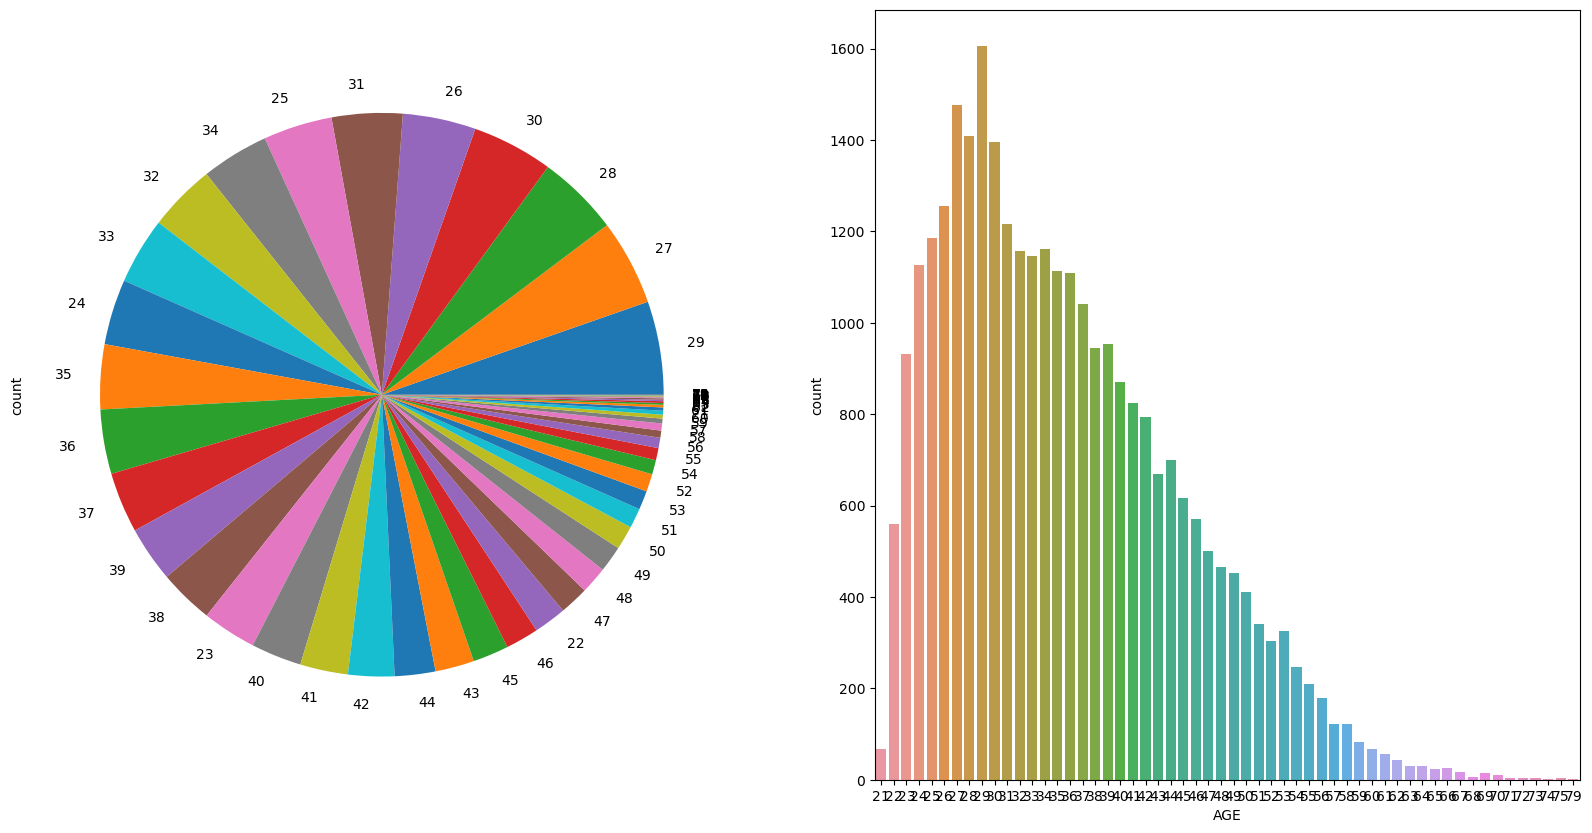

In [29]:
# Create a figure with 2 subplots arranged in one row and two columns, with a figure size of 20x10 inches
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))

# Compute the count of unique values in the 'AGE' column of the dataframe 'df', and reset the index to convert it to a DataFrame, storing it in 'Day_df'
Day_df = df['AGE'].value_counts().reset_index()

# Plot a pie chart of the counts of unique values in the 'AGE' column, specifying that the pie chart should be drawn on the first subplot (axes[0]). The 'subplots=True' parameter is not necessary here and can be omitted
df['AGE'].value_counts().plot(kind="pie", ax=axes[0])

# Plot a bar plot showing counts of unique values in 'AGE' on the second subplot. The 'x' axis is the index (i.e., the unique 'AGE' values) and the 'y' axis is the count of these values. The data for the bar plot is taken from 'Day_df'
sns.barplot(x='AGE', y='count', data=Day_df)

In [30]:
# Show credit card holders's middle age by corresponding expected next month default class from the `df` DataFrame
df.groupby('IsDefaulter')['AGE'].mean()

IsDefaulter
0    35.417266
1    35.725738
Name: AGE, dtype: float64

In [31]:
# Apply 'integer' datatype for all variables within the `df` DataFrame
df = df.astype('int')

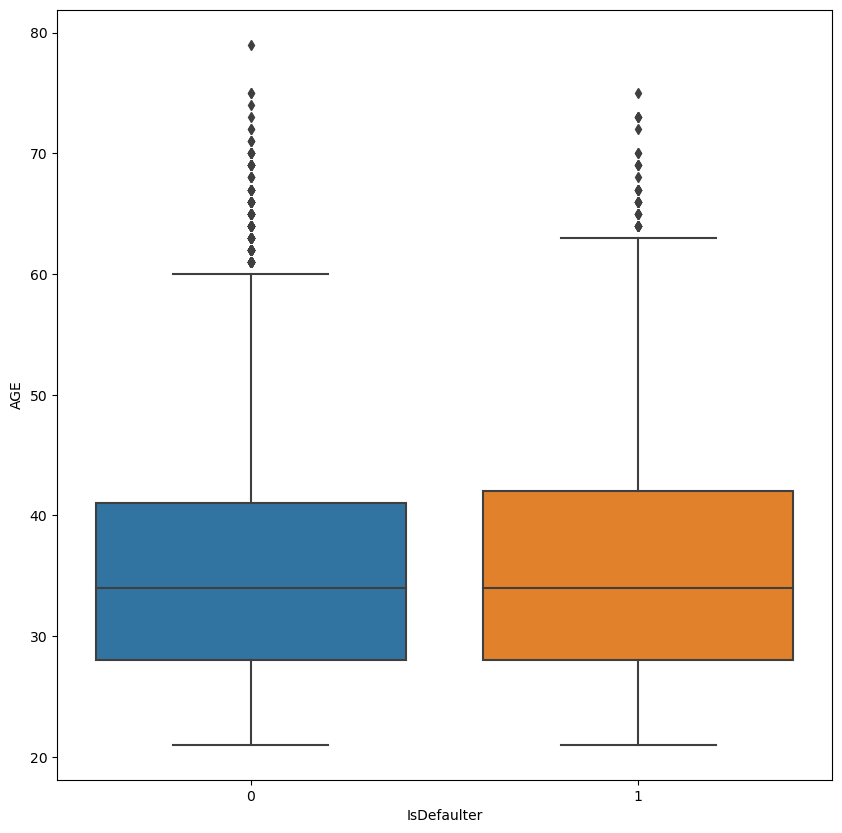

In [32]:
# Apply box plot to show the disribution of credit card holders' age by corresponding default class 
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="AGE", data=df)

**Bill Amount**

In [33]:
# Create independent `bill_amt_df` DataFrame for amount billed for credic card holders
bill_amnt_df = df[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]

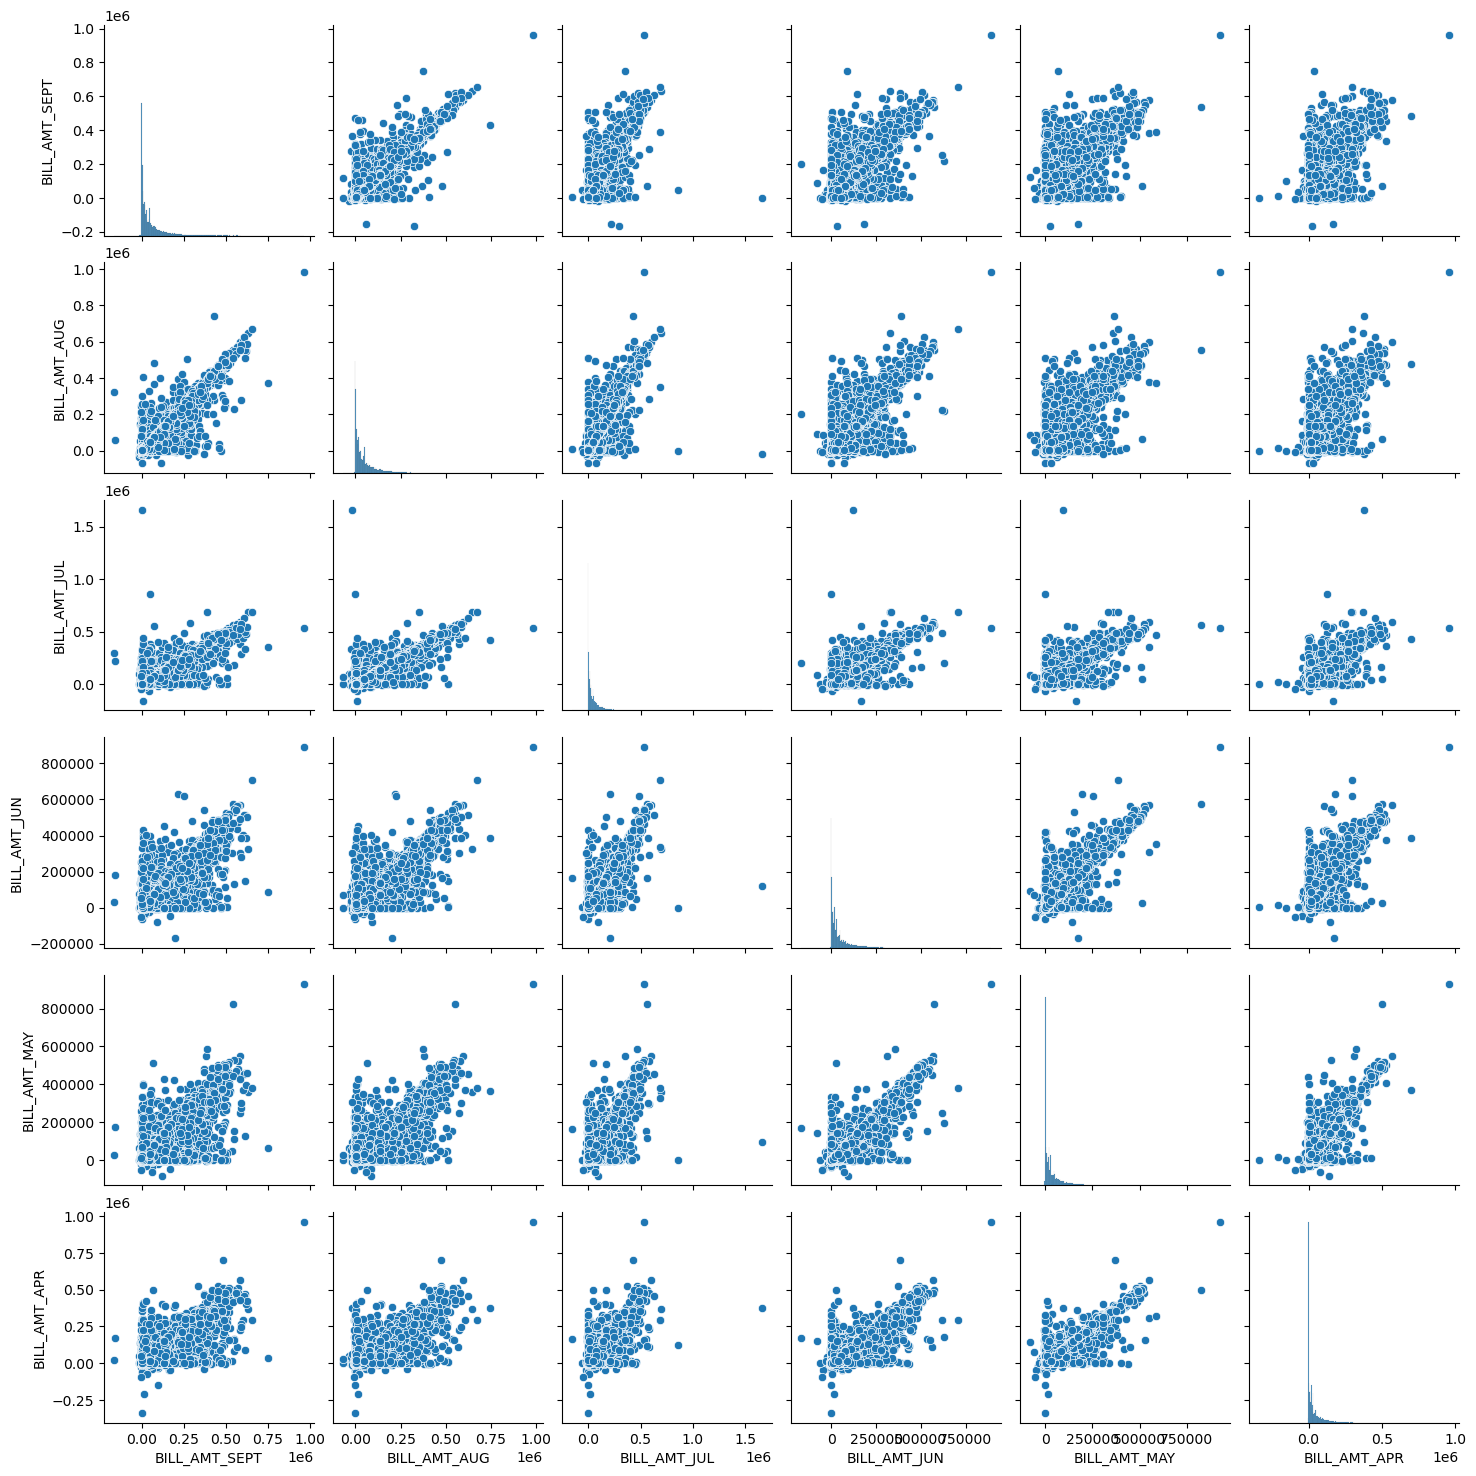

In [34]:
# Plot distibution of pairwise relationships within features of a `bill_amt_df` DataFrame
sns.pairplot(data = bill_amnt_df)

**History payment status**

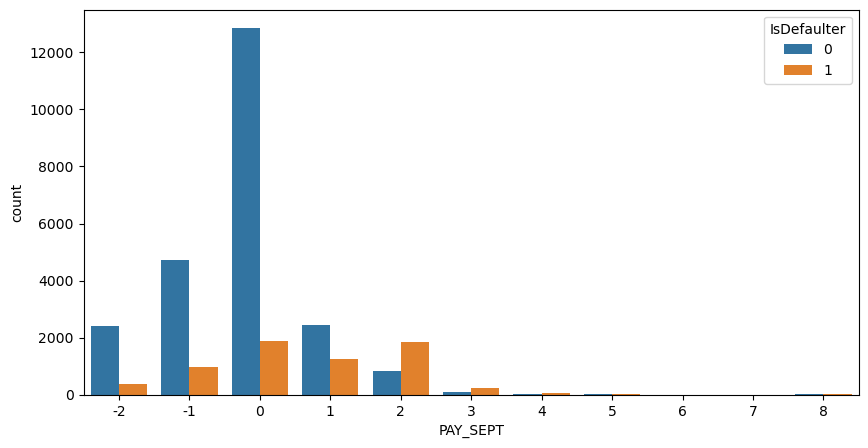

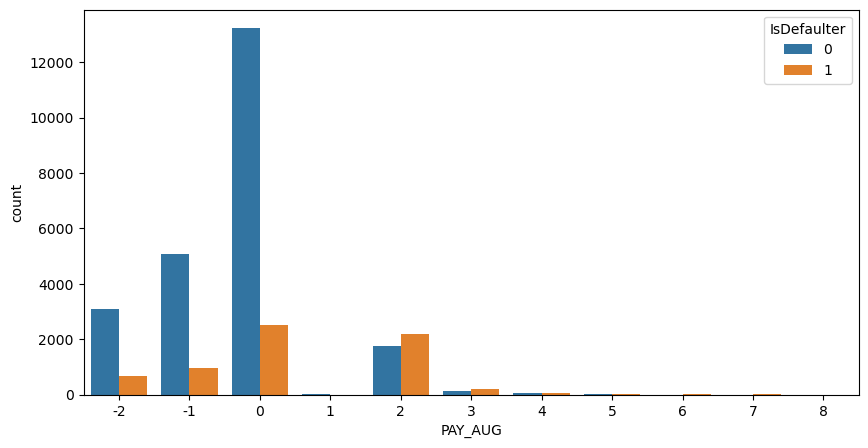

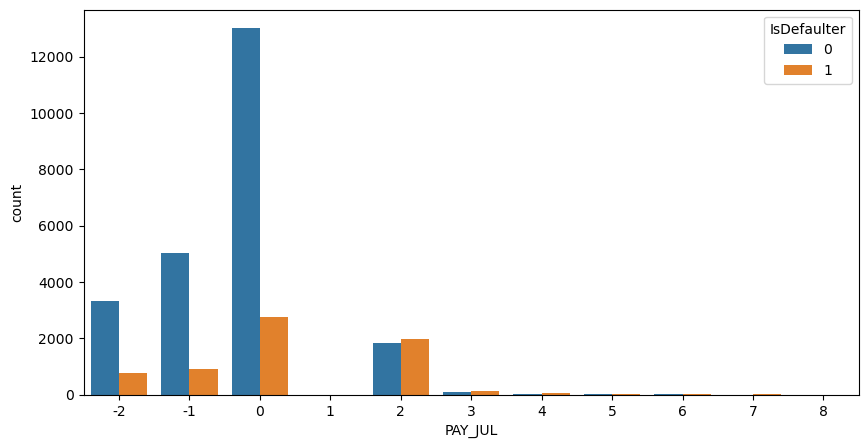

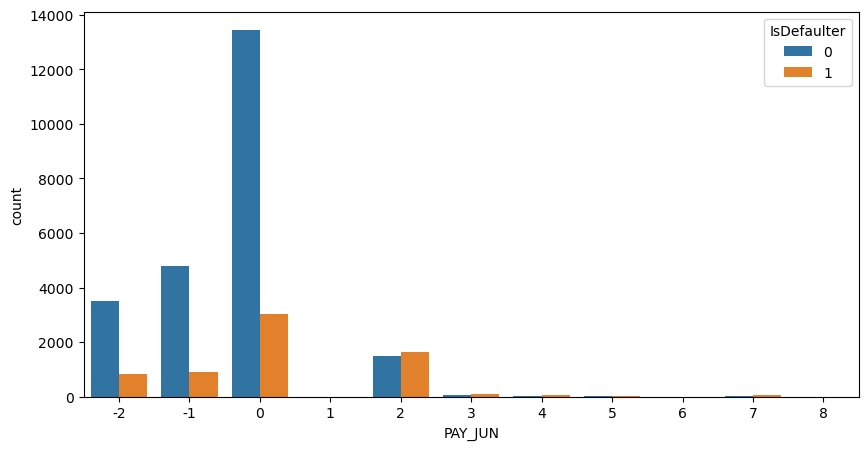

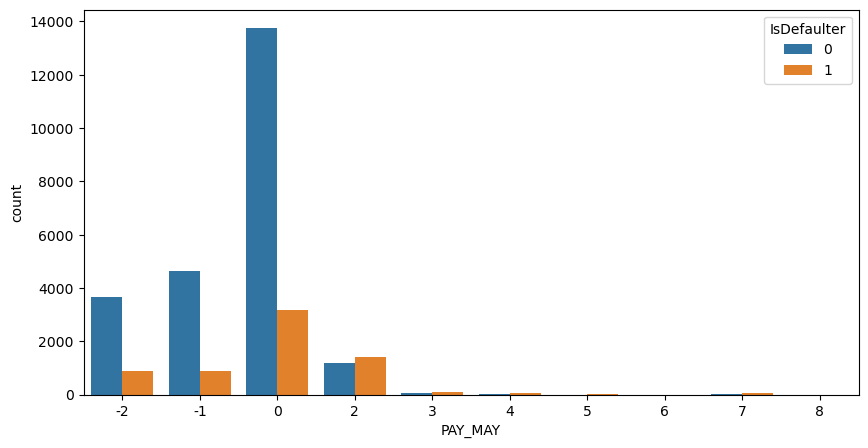

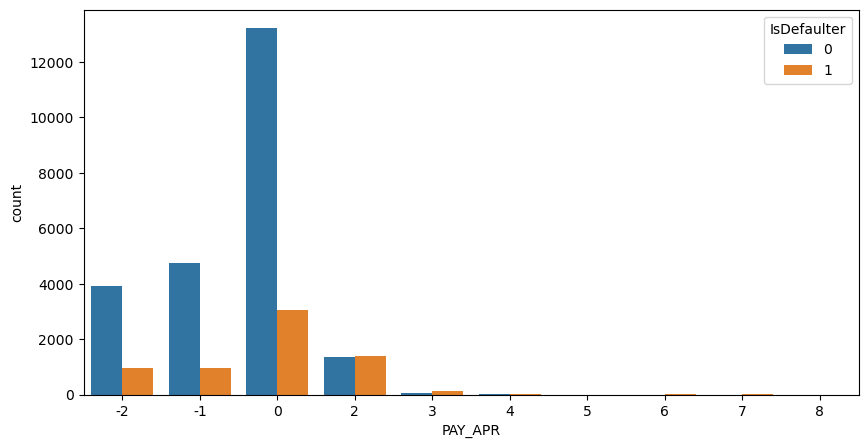

In [35]:
# Define a list of column names related to payment status for different months
pay_col = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']

# Iterate over each column name in the pay_col list
for col in pay_col:
    # Create a new figure with a specific size (width: 10 inches, height: 5 inches)
    plt.figure(figsize=(10,5))
    
    # Create a count plot for the current column with hue based on 'IsDefaulter'. This plot will show the distribution of payment statuses, differentiated by whether the individual is a defaulter or not
    sns.countplot(x=col, hue='IsDefaulter', data=df)

**Paid Amount**

In [36]:
# Select a subset of columns corresponding to payable amounts for credit from the original DataFrame 'df'
pay_amnt_df = df[['PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'IsDefaulter']]

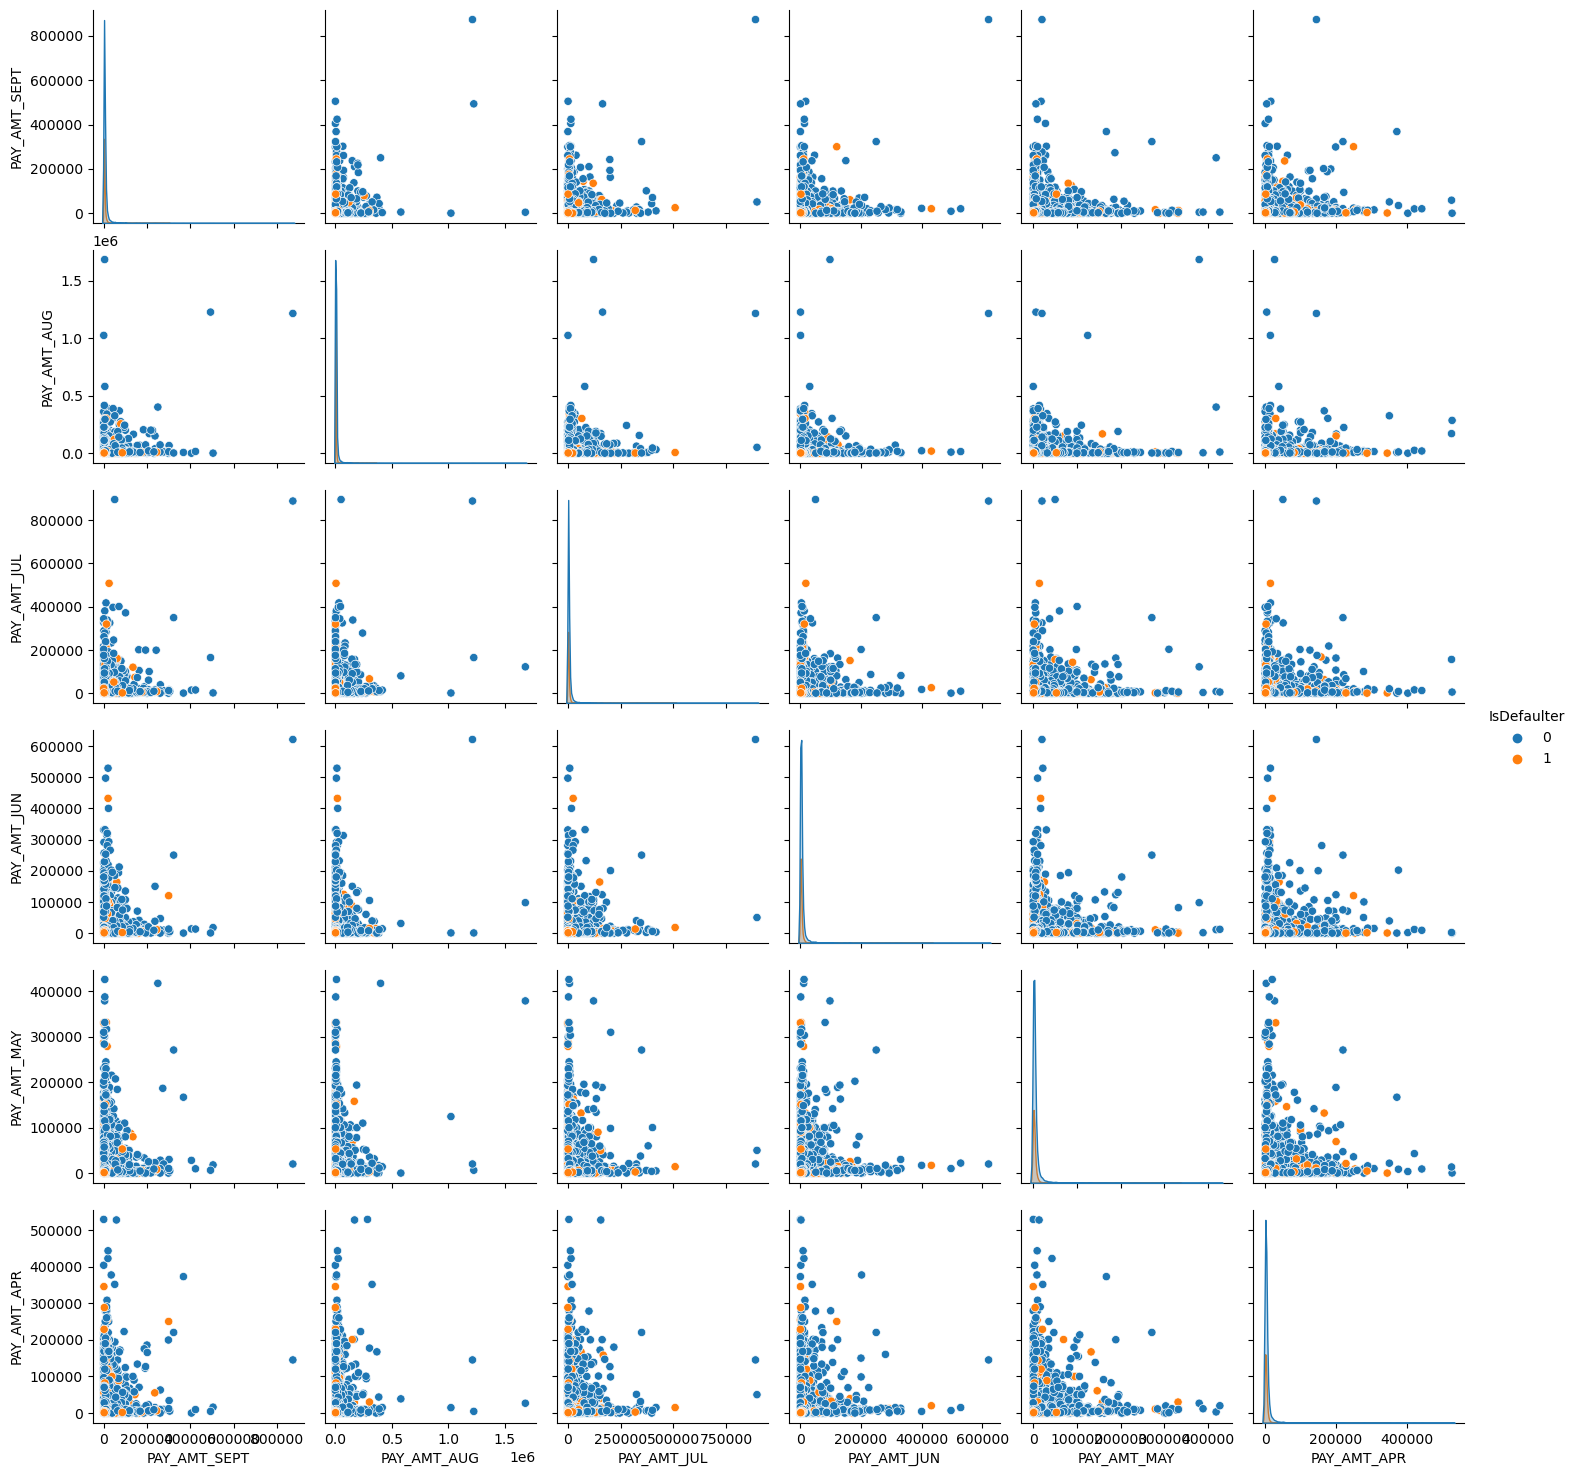

In [37]:
# Make visual inspection of relationships between payment amounts in different months
sns.pairplot(data = pay_amnt_df, hue='IsDefaulter')

In [38]:
# Inspect again shape of `df` DataFrame
df.shape

(30000, 26)

In [39]:
# Inspect `df` DataFrame
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,0
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,0


### **As we have seen earlier that we have imbalanced dataset. So to remediate Imbalance we are using SMOTE (Synthetic Minority Oversampling Technique)**

In [40]:
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['IsDefaulter'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [41]:
# Inspect the balanced `x_smote` DataFrame
x_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,26106,150000,1,1,1,28,0,-1,-1,0,...,360,0,0,609,360,0,0,0,0,1
46724,7505,20000,1,2,1,35,1,2,2,2,...,20314,18426,18580,0,2606,872,0,988,1006,1
46725,18803,260000,1,2,2,31,1,2,1,0,...,147170,210332,164782,15328,1958,3690,121011,6072,6003,1
46726,12998,30000,1,2,1,28,1,1,2,1,...,19964,20421,21623,1668,885,114,911,1684,890,1


In [42]:
# Save columns from original `df` DataFrame to list `columns`
columns = list(df.columns)

In [43]:
print(columns)

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'default.payment.next.month', 'IsDefaulter']


In [44]:
# Delete `IsDefault` column or target variable from list `columns`
columns.pop()

'IsDefaulter'

In [45]:
# Create new `balance_df` DataFrame
balance_df = pd.DataFrame(x_smote, columns=columns)

In [46]:
balance_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [47]:
# Renaming for better convinience
balance_df['IsDefaulter'] = balance_df['default.payment.next.month']
balance_df.drop('default.payment.next.month', axis = 1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,26106,150000,1,1,1,28,0,-1,-1,0,...,360,0,0,609,360,0,0,0,0,1
46724,7505,20000,1,2,1,35,1,2,2,2,...,20314,18426,18580,0,2606,872,0,988,1006,1
46725,18803,260000,1,2,2,31,1,2,1,0,...,147170,210332,164782,15328,1958,3690,121011,6072,6003,1
46726,12998,30000,1,2,1,28,1,1,2,1,...,19964,20421,21623,1668,885,114,911,1684,890,1


In [48]:
# Isolate target (dependent) variable out the `balance_df` DataFrame and assign it to variable `y_smote`
y_smote = balance_df['IsDefaulter']

<Axes: xlabel='IsDefaulter', ylabel='count'>

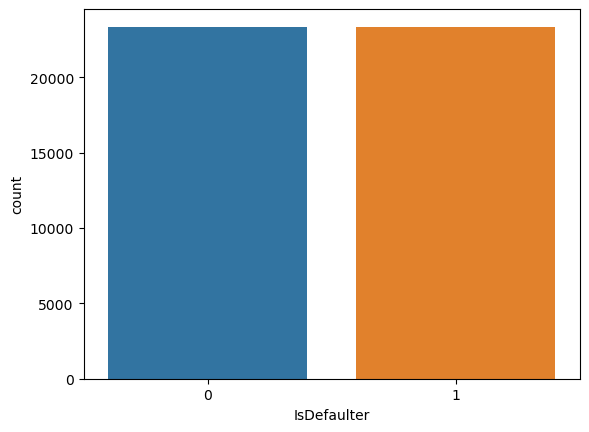

In [49]:
# Inspect distribution of default class in the balance_df` DataFrame
sns.countplot(x ='IsDefaulter', data = balance_df)

In [50]:
# Examine the `balance_df` DataFrame for credit card holders who may have a potential default status
balance_df[balance_df['IsDefaulter']==1]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1
13,14,70000,1,2,2,30,1,2,2,0,...,36137,36894,3200,0,3000,3000,1500,0,1,1
16,17,20000,1,1,2,24,0,0,2,2,...,17905,19104,3200,0,1500,0,1650,0,1,1
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,632,316,316,316,0,632,316,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,26106,150000,1,1,1,28,0,-1,-1,0,...,0,0,609,360,0,0,0,0,1,1
46724,7505,20000,1,2,1,35,1,2,2,2,...,18426,18580,0,2606,872,0,988,1006,1,1
46725,18803,260000,1,2,2,31,1,2,1,0,...,210332,164782,15328,1958,3690,121011,6072,6003,1,1
46726,12998,30000,1,2,1,28,1,1,2,1,...,20421,21623,1668,885,114,911,1684,890,1,1


### 6.3. Feature Engineering 

In [51]:
# Create a copy of the DataFrame 'balance_df' and store it in a new DataFrame called 'df_cl'
df_cl = balance_df.copy()

In [52]:
# Create a new column 'Payment_Value' in the DataFrame 'df_cl' by summing the values
df_cl['Payment_Value'] = df_cl['PAY_SEPT'] + df_cl['PAY_AUG'] + df_cl['PAY_JUL'] + df_cl['PAY_JUN'] + df_cl['PAY_MAY'] + df_cl['PAY_APR']

In [53]:
# Shows the average payment value for defaulters and non-defaulters
df_cl.groupby('IsDefaulter')['Payment_Value'].mean()

IsDefaulter
0   -1.980140
1    1.669492
Name: Payment_Value, dtype: float64

<Axes: xlabel='IsDefaulter', ylabel='Payment_Value'>

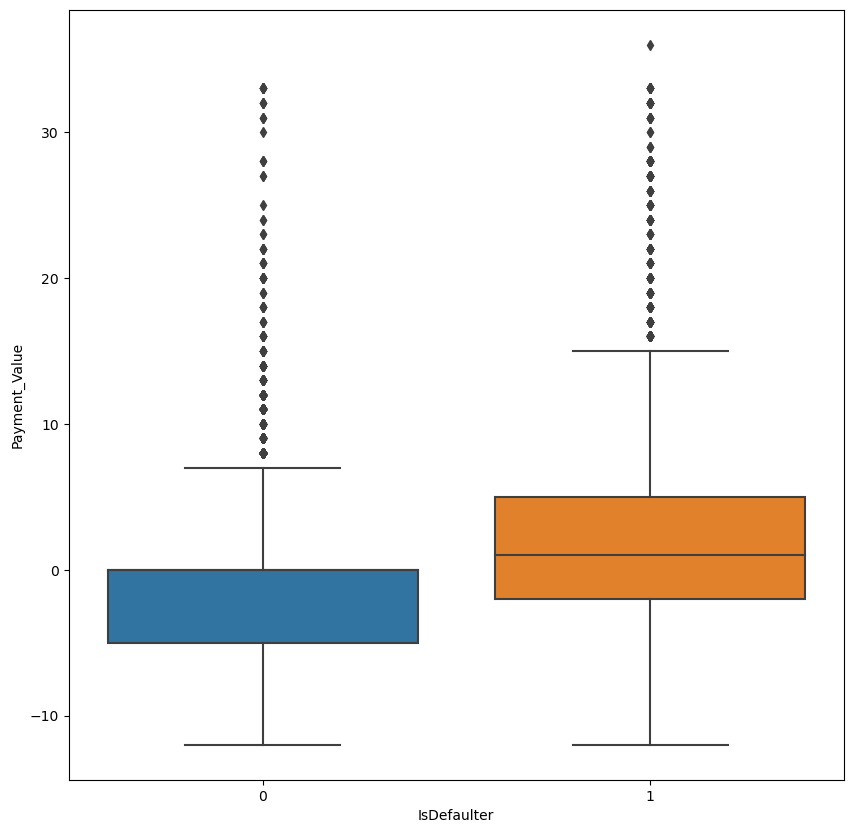

In [54]:
# Set the size of the plot to 10x10 inches
plt.figure(figsize=(10,10))

# Create a boxplot using seaborn to visualize the distribution of 'Payment_Value'
sns.boxplot(data=df_cl, x='IsDefaulter', y='Payment_Value')

In [55]:
# Calculate the total dues by subtracting the sum of payments made from the sum of bills for specific months
df_cl['Dues'] = (df_cl['BILL_AMT_APR']+df_cl['BILL_AMT_MAY']+df_cl['BILL_AMT_JUN']+df_cl['BILL_AMT_JUL']+df_cl['BILL_AMT_SEPT'])-(df_cl['PAY_AMT_APR']+df_cl['PAY_AMT_MAY']+df_cl['PAY_AMT_JUN']+df_cl['PAY_AMT_JUL']+df_cl['PAY_AMT_AUG']+df_cl['PAY_AMT_SEPT'])

In [56]:
# Group the DataFrame 'df_cl' by the column 'IsDefaulter'
df_cl.groupby('IsDefaulter')['Dues'].mean()

IsDefaulter
0    187742.051532
1    192697.989728
Name: Dues, dtype: float64

In [57]:
# Display the unique values present in the 'EDUCATION' column of the DataFrame 'df_cl'
df_cl['EDUCATION'].unique()

array([2, 1, 3, 4])

In [58]:
# Replace the value '6' in the 'EDUCATION' column with '4'.
df_cl['EDUCATION'] = np.where(df_cl['EDUCATION'] == 6, 4, df_cl['EDUCATION'])

# Replace the value '0' in the 'EDUCATION' column with '4'.
df_cl['EDUCATION'] = np.where(df_cl['EDUCATION'] == 0, 4, df_cl['EDUCATION'])

In [59]:
# Display the unique values present in the 'MARRIAGE' column of the DataFrame 'df_cl'
df_cl['MARRIAGE'].unique()

array([1, 2, 3])

In [60]:
# Update the 'MARRIAGE' column in the DataFrame df_fr. Replace 0 by 3
df_cl['MARRIAGE'] = np.where(df_cl['MARRIAGE'] == 0, 3, df_cl['MARRIAGE'])

In [61]:
# Replace the values in the DataFrame 'df_cl' based on specific mappings for multiple columns.
df_cl.replace(
    # Dictionary specifying the replacement mappings for different columns.
    {
        'SEX': {1: 'MALE', 2: 'FEMALE'},  # Replace 1 with 'MALE' and 2 with 'FEMALE' in the 'SEX' column.
        'EDUCATION': {1: 'graduate school', 2: 'university', 3: 'high school', 4: 'others'},  # Replace 1 with 'graduate school', 2 with 'university', 3 with 'high school', and 4 with 'others' in the 'EDUCATION' column.
        'MARRIAGE': {1: 'married', 2: 'single', 3: 'others'}  # Replace 1 with 'married', 2 with 'single', and 3 with 'others' in the 'MARRIAGE' column.
    },
    inplace=True  # Modify the DataFrame 'df_cl' in place without returning a new DataFrame.
)

In [62]:
# Inspect again the `df_cl` DataFrame
df_cl.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month,IsDefaulter,Payment_Value,Dues
0,1,20000,FEMALE,university,married,24,2,2,-1,-1,...,0,689,0,0,0,0,1,1,-2,3913
1,2,120000,FEMALE,university,single,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,1,3,10352
2,3,90000,FEMALE,university,single,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,0,0,76608
3,4,50000,FEMALE,university,married,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,0,0,174713
4,5,50000,MALE,university,married,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,0,-2,44620


#### One Hot Encoding

In [63]:
# Convert categorical variables in the DataFrame 'df_fr' to dummy/indicator variables
df_cl = pd.get_dummies(df_cl, columns=['EDUCATION', 'MARRIAGE'])

In [64]:
# Inspect again the `df_cl` DataFrame
df_cl.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,IsDefaulter,Payment_Value,Dues,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,1,20000,FEMALE,24,2,2,-1,-1,-2,-2,...,1,-2,3913,False,False,False,True,True,False,False
1,2,120000,FEMALE,26,-1,2,0,0,0,2,...,1,3,10352,False,False,False,True,False,False,True
2,3,90000,FEMALE,34,0,0,0,0,0,0,...,0,0,76608,False,False,False,True,False,False,True
3,4,50000,FEMALE,37,0,0,0,0,0,0,...,0,0,174713,False,False,False,True,True,False,False
4,5,50000,MALE,57,-1,0,-1,0,0,0,...,0,-2,44620,False,False,False,True,True,False,False


In [65]:
# Drop specific columns from the DataFrame `df_cl`
df_cl.drop(['EDUCATION_others', 'MARRIAGE_others'], axis=1, inplace=True)

In [66]:
# Convert categorical variables into dummy/indicator variables
df_cl = pd.get_dummies(df_cl,               # The DataFrame to which we apply the transformation
                       columns=['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR'],  # Columns to be encoded
                       drop_first=True)  # Drop the first category to avoid multicollinearity (reference category)

In [67]:
# Inspect again the `df_cl` DataFrame
df_cl.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,FEMALE,24,3913,3102,689,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,2,120000,FEMALE,26,2682,1725,2682,3272,3455,3261,...,False,False,False,True,False,False,False,False,False,False
2,3,90000,FEMALE,34,29239,14027,13559,14331,14948,15549,...,False,True,False,False,False,False,False,False,False,False
3,4,50000,FEMALE,37,46990,48233,49291,28314,28959,29547,...,False,True,False,False,False,False,False,False,False,False
4,5,50000,MALE,57,8617,5670,35835,20940,19146,19131,...,False,True,False,False,False,False,False,False,False,False


In [68]:
# Replace the categorical values for `SEX` variable in the DataFrame 'df_cl
encoders_nums = {
    "SEX": {"FEMALE": 0, "MALE": 1}
}

df_cl = df_cl.replace(encoders_nums)

In [69]:
# Inspect again the `df_cl` DataFrame
df_cl.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,0,24,3913,3102,689,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,2,120000,0,26,2682,1725,2682,3272,3455,3261,...,False,False,False,True,False,False,False,False,False,False
2,3,90000,0,34,29239,14027,13559,14331,14948,15549,...,False,True,False,False,False,False,False,False,False,False
3,4,50000,0,37,46990,48233,49291,28314,28959,29547,...,False,True,False,False,False,False,False,False,False,False
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,...,False,True,False,False,False,False,False,False,False,False


In [70]:
# Drop the column named 'ID' from the DataFrame df_cl
df_cl.drop('ID', axis=1, inplace=True)

In [71]:
# Save the DataFrame 'df_cl' to a CSV file named 'Final_cl.csv' in the 'data' directory
df_cl.to_csv('./data/Final_cl.csv', index=False)

# Read the CSV file named 'Final_cl.csv' from the 'data' directory into a DataFrame 'df_cl'
df_cl = pd.read_csv('./data/Final_cl.csv')

In [72]:
# Inspect again the `df_cl` DataFrame
df_cl.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,0,24,3913,3102,689,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,...,False,False,False,True,False,False,False,False,False,False
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,...,False,True,False,False,False,False,False,False,False,False
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,...,False,True,False,False,False,False,False,False,False,False
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,False,True,False,False,False,False,False,False,False,False


In [73]:
# # Drop the column named 'Unnamed: 0' from the DataFrame 'df_cl'
# df_cl.drop(['Unnamed: 0'],axis = 1, inplace = True)

## 7. Model Selection

### 7.1. Logistic Regression Classification

Definition: Logistic Regression is one of the simplest and transperent algorithms which estimates the relationship between one dependent binary variable and independent variables, computing the probability of occurrence of an event. The regulation parameter `C` controls the trade-off between increasing complexity (overfitting) and keeping the model simple (underfitting). For large values of `C`, the power of regulation is reduced and the model increases its complexity, thus overfitting the data.

In [74]:
# Create a separate DataFrame 'df_log_reg' for logistic regression classification task by copying the existing DataFrame 'df_cl'
df_log_reg = df_cl.copy()

In [75]:
# Inspect the `df_log_reg` DataFrame
df_log_reg.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,0,24,3913,3102,689,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,...,False,False,False,True,False,False,False,False,False,False
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,...,False,True,False,False,False,False,False,False,False,False
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,...,False,True,False,False,False,False,False,False,False,False
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,False,True,False,False,False,False,False,False,False,False


In [76]:
print(f'The length of data set for logistic regression model is:')
len(df_log_reg)

The length of data set for logistic regression model is:


46728

In [77]:
print(f'The length of target variable is:')
len(y_smote)

The length of target variable is:


46728

In [78]:
print(f'Do they have the same dimention?')
len(df_log_reg) == len(y_smote)

Do they have the same dimention?


True

In [79]:
# Drop specified columns from the DataFrame 'df_log_reg' such as 'IsDefaulter', 'Payement_Value', 'Dues' and assign the rest for the `X` DataFrame 
X = df_log_reg.drop(['IsDefaulter','Payment_Value','Dues'], axis=1)

# Upload the target value `y_smote`
y = y_smote

In [80]:
# Retrieve the column names from the DataFrame `X`
columns = X.columns
columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
       'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR', 'default.payment.next.month',
       'EDUCATION_graduate school', 'EDUCATION_high school',
       'EDUCATION_university', 'MARRIAGE_married', 'MARRIAGE_single',
       'PAY_SEPT_-1', 'PAY_SEPT_0', 'PAY_SEPT_1', 'PAY_SEPT_2', 'PAY_SEPT_3',
       'PAY_SEPT_4', 'PAY_SEPT_5', 'PAY_SEPT_6', 'PAY_SEPT_7', 'PAY_SEPT_8',
       'PAY_AUG_-1', 'PAY_AUG_0', 'PAY_AUG_1', 'PAY_AUG_2', 'PAY_AUG_3',
       'PAY_AUG_4', 'PAY_AUG_5', 'PAY_AUG_6', 'PAY_AUG_7', 'PAY_AUG_8',
       'PAY_JUL_-1', 'PAY_JUL_0', 'PAY_JUL_1', 'PAY_JUL_2', 'PAY_JUL_3',
       'PAY_JUL_4', 'PAY_JUL_5', 'PAY_JUL_6', 'PAY_JUL_7', 'PAY_JUL_8',
       'PAY_JUN_-1', 'PAY_JUN_0', 'PAY_JUN_1', 'PAY_JUN_2', 'PAY_JUN_3',
       'PAY_JUN_4', 'PAY_JUN_5', 'PAY_JUN_6', 'PAY_JUN_7', 'PAY_JUN_8',
      

In [81]:
# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Fit the scaler to the data (X) and transform it [makes data stationary mean of 0 and a standard deviation of 1]
X = scaler.fit_transform(X)

In [82]:
# Split the data into the training and testing data sets with a proportion of 67/33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [83]:
# Itemize parameters for regularization to search best value under optimization
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [84]:
# Initialize the GridSearchCV object
grid_lr_clf = GridSearchCV(
    estimator=LogisticRegression(),   # Model to tune
    param_grid=param_grid,            # Dictionary with hyperparameters to search
    scoring='accuracy',               # Evaluation metric
    n_jobs=-1,                        # Use all cores for parallel processing
    verbose=3,                        # Level of detail in output
    cv=3                              # Number of cross-validation folds
)

# Fit the GridSearchCV object to the training data
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [85]:
# Retrieve the best estimator for logistic regression from the grid search object
optimized_clf = grid_lr_clf.best_estimator_
optimized_clf

LogisticRegression(C=0.01)

In [86]:
# Return the best value for regularization parameter of logistic regression
grid_lr_clf.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [87]:
# Returns the best performance score of the logistic regression model
grid_lr_clf.best_score_

1.0

In [88]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [89]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [90]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  1.0
The accuracy on test data is  1.0


In [91]:
# Inspect other statistics from logistic classifier
test_accuracy_lr = accuracy_score(test_class_preds, y_test)
test_precision_score_lr = precision_score(test_class_preds, y_test)
test_recall_score_lr = recall_score(test_class_preds, y_test)
test_f1_score_lr = f1_score(test_class_preds, y_test)
test_roc_score_lr = roc_auc_score(test_class_preds, y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  1.0
The precision on test data is  1.0
The recall on test data is  1.0
The f1 on test data is  1.0
The roc_score on test data is  1.0


[[15653     0]
 [    0 15654]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

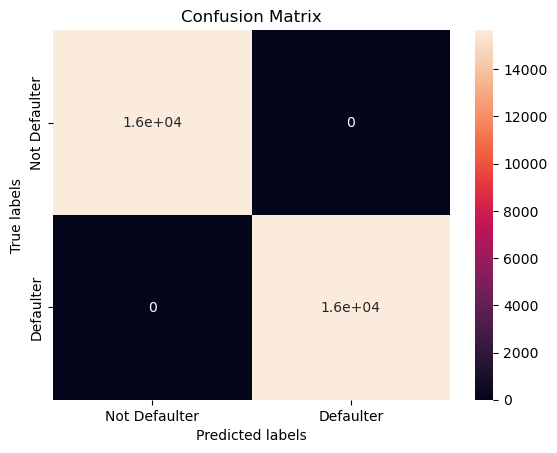

In [92]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [93]:
# Create a DataFrame to store feature importance scores
feature_importance = pd.DataFrame({'Features': columns, 'Importance': np.abs(optimized_clf.coef_).ravel() })

In [94]:
# Sort the DataFrame by the 'Importance' column in descending order
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

Text(0.5, 1.0, 'Feature importances via coefficients')

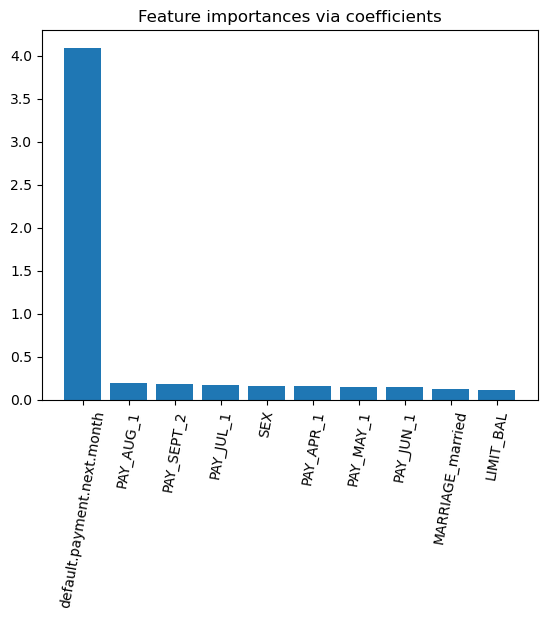

In [95]:
# Plot feature importance
plt.bar(height=feature_importance['Importance'], x = feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")

In [96]:
# Select probabilities for a positive class (high probability of default next moth)
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]
y_preds_proba_lr

array([0.01362709, 0.01035896, 0.01914817, ..., 0.00966553, 0.00928559,
       0.98986178])

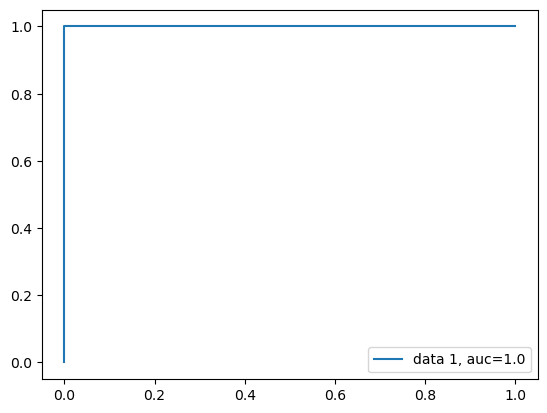

In [97]:
# Assign the predicted probabilities (from the logistic regression model) to y_pred_proba
y_pred_proba = y_preds_proba_lr

# Calculate the false positive rate (fpr) and true positive rate (tpr) for different threshold values using the roc_curve function
# y_test is the true labels, y_pred_proba are the predicted probabilities
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Calculate the Area Under the ROC Curve (AUC) using roc_auc_score
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve with false positive rate on the x-axis and true positive rate on the y-axis
# The label of the curve includes the calculated AUC value
plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))

# Display the legend in the lower right corner of the plot (loc=4)
plt.legend(loc=4)

# Display the plot
plt.show()

### 7.2. Support Vector Classification

In [98]:
# Defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],   
              'kernel': ['rbf']} 

In [99]:
# Remove the columns 'IsDefaulter', 'Payment_Value', and 'Dues' from the dataframe 'df_cl' # and assign the resulting dataframe to the variable 'X'
X = df_cl.drop(['IsDefaulter','Payment_Value','Dues'], axis=1)

# Select the 'IsDefaulter' column from the dataframe 'df_cl' and assign it to the variable 'y'
y = df_cl['IsDefaulter']

In [100]:
# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Fit the scaler to the data (X) and transform it [makes data stationary mean of 0 and a standard deviation of 1]
X = scaler.fit_transform(X)

In [101]:
# Split the data into the training and testing data sets with a proportion of 67/33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [103]:
# Itemize parameters for regularization to search best value under optimization
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]} 

# Initialize the GridSearchCV object
grid_clf = GridSearchCV(
    estimator=SVC(probability=True),  # Model to tune
    param_grid=param_grid,            # Dictionary with hyperparameters to search
    scoring='accuracy',               # Evaluation metric
    n_jobs=-1,                        # Use all cores for parallel processing
    verbose=3,                        # Level of detail in output
    cv=3                              # Number of cross-validation folds
)

# Fit the GridSearchCV object to the training data
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


In [ ]:
# Retrieve the best estimator for logistic regression from the grid search object
optimal_SVC_clf = grid_clf.best_estimator_
optimal_SVC_clf

LogisticRegression(C=0.01)

In [ ]:
# Return the best value for regularization parameter of logistic regression
grid_clf.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [ ]:
# Returns the best performance score of the logistic regression model
grid_clf.best_score_

1.0

In [ ]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_SVC = accuracy_score(train_class_preds,y_train)
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  1.0
The accuracy on test data is  1.0


In [ ]:
# Inspect other statistics from support vectom machine classifier
test_accuracy_SVC = accuracy_score(test_class_preds, y_test)
test_precision_score_SVC = precision_score(test_class_preds, y_test)
test_recall_score_SVC = recall_score(test_class_preds, y_test)
test_f1_score_SVC = f1_score(test_class_preds, y_test)
test_roc_score_SVC = roc_auc_score(test_class_preds, y_test)

print("The accuracy on test data is ", test_accuracy_SVC)
print("The precision on test data is ", test_precision_score_SVC)
print("The recall on test data is ", test_recall_score_SVC)
print("The f1 on test data is ", test_f1_score_SVC)
print("The roc_score on test data is ", test_roc_score_SVC)

The accuracy on test data is  1.0
The precision on test data is  1.0
The recall on test data is  1.0
The f1 on test data is  1.0
The roc_score on test data is  1.0


[[15653     0]
 [    0 15654]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

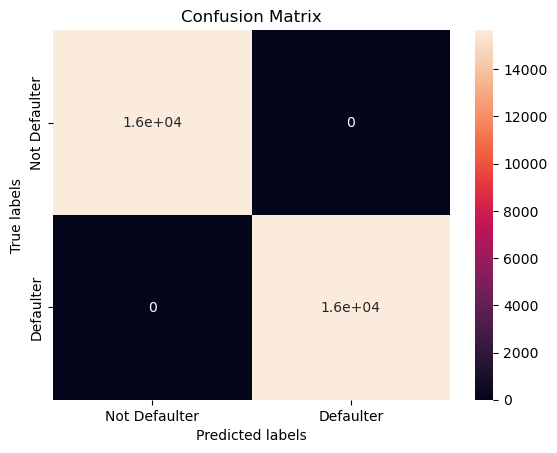

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Define the name for the saved model file.
model_save_name = 'SVC_optimized_classifier.pkl'

# Specify the path where the model will be saved.
path = f"./models/{model_save_name}"

# Save the trained SVC model (optimal_SVC_clf) to the specified path using joblib.
joblib.dump(optimal_SVC_clf, path)

['./models/SVC_optimized_classifier.pkl']

In [ ]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [ ]:
# Predicted Probability
y_pred_proba_SVC = optimal_SVC_clf.predict_proba(X_test)[::,1]

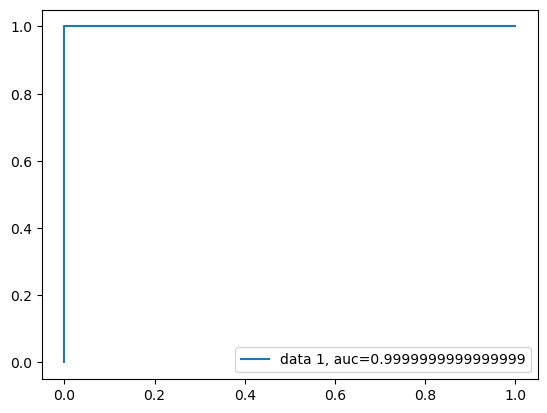

In [ ]:
# ROC AUC (Receiver Operating Characteristic Area Under the Curve) CURVE
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_SVC)
auc = roc_auc_score(y_test, y_pred_proba_SVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### 7.3. Decision Tree

Definition: The Decision Tree is a widely used algorithm for classification problems due to its ease of interpretation and understanding but the disadvantage is not full of transperency. In a Decision Tree, each internal node represents a feature, each branch corresponds to a decision rule, and each leaf node indicates an outcome. Some advantages of Decision Trees include requiring minimal data preprocessing, such as no need for feature normalization. However, they are prone to overfitting with noisy data and can produce biased results when the dataset is imbalanced

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}

In [ ]:
# Prepare the feature matrix `X` and target vector `y`
X = df_cl.drop(['IsDefaulter','Payment_Value','Dues'], axis=1)
y = df_cl['IsDefaulter']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
# Initialize GridSearchCV to find the best hyperparameters for a DecisionTreeClassifier
grid_DTC_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)

# Fit GridSearchCV to the training data
grid_DTC_clf.fit(X_train, y_train)

In [ ]:
# Retrieve the best score from the grid search
grid_DTC_clf.best_score_

In [ ]:
# Retrieve the best estimator found by the grid search
optimal_DTC_clf = grid_DTC_clf.best_estimator_

In [ ]:
# Retrieve the best parameters found by the grid search
grid_DTC_clf.best_params_

In [ ]:
# Get the predicted classes
train_class_preds = optimal_DTC_clf.predict(X_train)
test_class_preds = optimal_DTC_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_DTC = accuracy_score(train_class_preds,y_train)
test_accuracy_DTC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_DTC)
print("The accuracy on test data is ", test_accuracy_DTC)

### 7.4. Random Forest

In [ ]:
# Drop columns 'IsDefaulter', 'Payment_Value', and 'Dues' from the dataframe df_cl to create the feature matrix `X`
X = df_cl.drop(['IsDefaulter','Payement_Value','Dues'], axis=1)

# Extract the target variable 'IsDefaulter' from `df_cl` to create the target vector `y`
y = df_cl['IsDefaulter']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
# Create an instance of the RandomForestClassifier
rf_clf = RandomForestClassifier()

# Fit the RandomForestClassifier model using training data X_train and y_train
rf_clf.fit(X_train,y_train)

In [ ]:
# Define a grid of hyperparameters to search over for the RandomForestClassifier
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [ ]:
# Create an instance of GridSearchCV to perform an exhaustive search over the parameter grid
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)

# Fit the GridSearchCV instance with the training data X_train and y_train to find the best parameters
grid_rf_clf.fit(X_train, y_train)

In [ ]:
# Get the best accuracy score from the GridSearchCV
grid_rf_clf.best_score_

In [ ]:
# Get the best parameters from the GridSearchCV
grid_rf_clf.best_params_

In [ ]:
# Get the best estimator (model) from the GridSearchCV
optimal_rf_clf = grid_rf_clf.best_estimator_

In [ ]:
# Get the predicted classes on training and testing data
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [ ]:
# Get the accuracy scores on training and testing data
train_accuracy_rf = accuracy_score(train_class_preds, y_train)
test_accuracy_rf = accuracy_score(test_class_preds, y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

In [ ]:
# Get the accuracy scores and other metrics on testiing data
test_accuracy_rf = accuracy_score(test_class_preds, y_test)
test_precision_score_rf = precision_score(test_class_preds, y_test)
test_recall_score_rf = recall_score(test_class_preds, y_test)
test_f1_score_rf = f1_score(test_class_preds, y_test)
test_roc_score_rf = roc_auc_score(test_class_preds, y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

In [ ]:
# Inspect prababilities from Random Forest Classifier
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]

In [ ]:
# Calculate ROC curve and AUC score for the test data
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Get the number of feature importances (i.e., number of features used by the model)
len(optimal_rf_clf.feature_importances_)

In [ ]:
# Create a DataFrame of feature importances from the best model
feature_importances_rf = pd.DataFrame(optimal_rf_clf.feature_importances_,
                                      index=columns,
                                      columns=['importance_rf']).sort_values('importance_rf',
                                                                            ascending=False)[:10]

# Plot the top 10 feature importances
plt.subplots(figsize=(17, 6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="g", align="center")
plt.xticks(feature_importances_rf.index, rotation=85)
#plt.xlim([-1, X.shape[1]])
# Display the plot
plt.show()

In [ ]:
# Define the name for the saved model file.
model_save_name = 'rf_optimized_classifier.pkt'

# Specify the path where the model will be saved.
path = f"./models/{model_save_name}"

# Save the trained SVC model (optimal_SVC_clf) to the specified path using joblib.
joblib.dump(optimal_rf_clf, path)

### 7.5. XGBoost Classification

In [ ]:
# Drop columns 'IsDefaulter', 'Payment_Value', and 'Dues' from the dataframe df_cl to create the feature matrix `X`
X = df_cl.drop(['IsDefaulter','Payement_Value','Dues'], axis=1)

# Extract the target variable 'IsDefaulter' from `df_cl` to create the target vector `y`
y = df_cl['IsDefaulter']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
# Define a grid of hyperparameters to search over for the RandomForestClassifier
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

# Create an instance of GridSearchCV to perform an exhaustive search over the parameter grid
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)

# Fit the GridSearchCV instance with the training data X_train and y_train to find the best parameters
gsearch1.fit(X_train, y_train)

In [ ]:
# Get the best accuracy score from the GridSearchCV
gsearch1.best_score_

In [ ]:
# Get the best parameters from the GridSearchCV
grid_rf_clf.best_params_

In [ ]:
# Get the best estimator (model) from the GridSearchCV
optimal_xgb = gsearch1.best_estimator_

In [ ]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

In [ ]:
# Get the accuracy scores and other metrics on testiing data
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on train data is ", test_roc_score_xgb_tuned)

In [ ]:
# Create a DataFrame from the feature importances of the optimal XGBoost model
pd.DataFrame(
    optimal_xgb.feature_importances_,  # Data: feature importances from the XGBoost model
    index=columns,  # Use 'columns' as the index of the DataFrame, which should be a list of feature names
    columns=['importance_xgb']  # Set the column name to 'importance_xgb'
).sort_values(
    'importance_xgb',  # Sort the DataFrame by the 'importance_xgb' column
    ascending=False  # Sort in descending order, so the most important features come first
)[:10]  # Select the top 10 rows, which represent the 10 most important features

In [ ]:
# Feature Importance
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="b",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
# Inspect prababilities from XGBoost Classification model
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

In [ ]:
# Calculate ROC curve and AUC score for the test data
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Define the name for the saved model file.
model_save_name = 'xgb_optimized_classifier'

# Specify the path where the model will be saved.
path = f"./models/{model_save_name}"

# Save the trained SVC model (optimal_SVC_clf) to the specified path using joblib.
joblib.dump(optimal_xgb, path)

## 8. Evaluating the models

In [ ]:
# Describe the function
recall_score

In [ ]:
classifiers = ['Logistic Regression', 'SVC', 'Random Forest CLf', 'Xgboost Clf']
train_accuracy = [train_accuracy_lr, train_accuracy_SVC, train_accuracy_rf, train_accuracy_xgb_tuned]
test_accuracy = [test_accuracy_lr, test_accuracy_SVC, test_accuracy_rf, test_accuracy_xgb_tuned]
precision_score = [test_precision_score_lr, test_precision_score_SVC, test_precision_score_rf, test_precision_xgb_tuned]
recall_score = [test_recall_score_lr, test_recall_score_SVC, test_recall_score_rf, test_recall_score_xgb_tuned]
f1_score = [test_f1_score_lr, test_f1_score_SVC, test_f1_score_rf, test_f1_score_xgb_tuned]

In [ ]:
# Create the DataFrame to show the metrics from each of classification models
pd.DataFrame({'Classifier':classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score })

### Plotting ROC AUC for all the models

In [ ]:
# Iterate through probabilities of default from each of classification models
classifiers_proba = [(optimized_clf, y_preds_proba_lr), 
               (optimal_rf_clf, y_preds_proba_rf), 
               (optimal_xgb, y_preds_proba_xgb),
               (optimal_SVC_clf,y_pred_proba_SVC)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [ ]:
# Return the prability matrix from each of classification models
result_table

In [ ]:
# Plot the ROC AOC curve by each of classification models
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()